<a href="https://colab.research.google.com/github/SaurabhIndi/UM-Projects/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('dataset_med.csv')


Saving dataset_med.csv to dataset_med.csv


In [ ]:
data = pd.read_csv("dataset_med.csv")

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


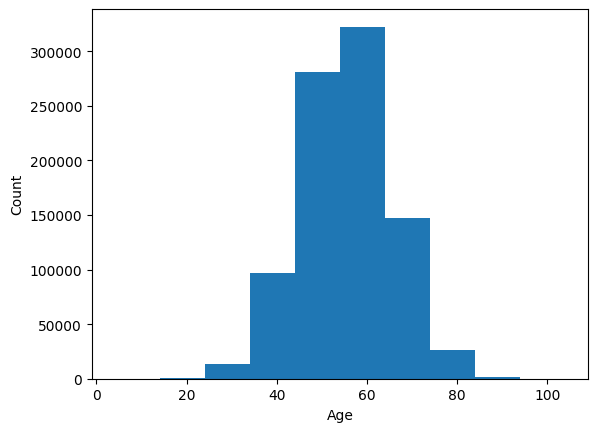

In [ ]:
# Example: Check for missing values
print(data.isnull().sum())

# Example: Visualize the distribution of age
import matplotlib.pyplot as plt
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Example: Encode categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

# Example: Scale numerical features
scaler = StandardScaler()
data[['age', 'bmi', 'cholesterol_level']] = scaler.fit_transform(data[['age', 'bmi', 'cholesterol_level']])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])
data['country'] = le.fit_transform(data['country'])  # Encode 'Romania' and other countries
data['treatment_type'] = le.fit_transform(data['treatment_type'])

In [ ]:
import pandas as pd

data['diagnosis_year'] = pd.to_datetime(data['diagnosis_date']).dt.year
data['diagnosis_month'] = pd.to_datetime(data['diagnosis_date']).dt.month
# ... similar operations for day of week, etc.

In [ ]:
# Assuming diagnosis_date is a string type
data['diagnosis_year'] = pd.to_datetime(data['diagnosis_date']).dt.year
data['diagnosis_month'] = pd.to_datetime(data['diagnosis_date']).dt.month
data.drop('diagnosis_date', axis=1, inplace=True)  # Remove original string date

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['cancer_stage'] = le.fit_transform(data['cancer_stage'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['family_history'] = le.fit_transform(data['family_history'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

# Repeat for other similar features (e.g., hypertension, asthma, etc.)

In [ ]:
import pandas as pd

data['treatment_end_year'] = pd.to_datetime(data['end_treatment_date']).dt.year
data['treatment_month'] = pd.to_datetime(data['end_treatment_date']).dt.month
# ... similar operations for other relevant parts of the date

In [ ]:
# Assuming end_treatment_date is a string type
data['treatment_end_year'] = pd.to_datetime(data['end_treatment_date']).dt.year
data['treatment_month'] = pd.to_datetime(data['end_treatment_date']).dt.month
data.drop('end_treatment_date', axis=1, inplace=True)  # Remove original string date

In [ ]:
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7788707865168539


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.00      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.39      0.50      0.44    178000
weighted avg       0.61      0.78      0.68    178000

[[138639      0]
 [ 39361      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
